In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#importong dataset
from tensorflow.examples.tutorials.mnist import input_data

/home/sarthak/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mnist = input_data.read_data_sets("MNIS_data/",one_hot=True)

Extracting MNIS_data/train-images-idx3-ubyte.gz
Extracting MNIS_data/train-labels-idx1-ubyte.gz
Extracting MNIS_data/t10k-images-idx3-ubyte.gz
Extracting MNIS_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

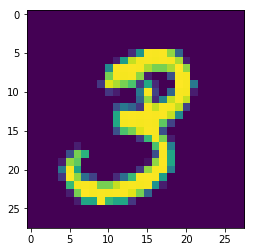

In [5]:
#printing an image
img = mnist.train.images[1]
img = np.array(img,dtype='float')
img = img.reshape((28,28))
plt.imshow(img)
plt.show()

In [6]:
#Architecture of Neural network

##Declaring Units in each layer
n_inputs = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10

##Creating Weights and Biases
weights={
    'h1':tf.Variable(tf.random_normal([n_inputs,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
}

biases = {
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [7]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [8]:
def forward_propagation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    
    return output

In [9]:
x = tf.placeholder("float", [None, n_inputs])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels = y))

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
#Batch_Gradient_Descent
batch_size = 100
for i in range(30):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

25337.828464746475
4765.561190275914
2435.874481844977
1576.5901906592503
1177.4282472810944
1061.9140551145756
937.429140906955
874.5368251207203
744.3308084200567
701.5109412075241
522.4929491675261
534.6843838276516
471.3983254560266
444.76865347587676
343.18905717399934
309.7393812626492
255.65857413964352
199.87214700339916
198.82606894374135
166.13681169176562
175.40972313885823
123.0861982314891
124.52592716609956
135.2498284968242
119.16553735799971
94.14137120926534
88.33315296765068
99.41562573070769
88.40310471220437
74.91994706733385


In [17]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,correct_labels)


In [18]:
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9570

So out of 10000 testing data point my neural network is predicting 9570 correctly
Therefore the accuracy is 95.70%